In [1]:
import pandas as pd
import numpy as np
import scikitplot.plotters as skplt
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import log_loss, accuracy_score
from sklearn.model_selection import StratifiedKFold

In [2]:
def trans(str0):
    if str0 == False:
        return 0
    else:
        return 1
df = pd.read_csv('zillow_feature.csv')
df.drop('Unnamed: 0', axis=1, inplace=True)
df['owner_occupied'] = df['owner_occupied'].apply(trans)

In [3]:
train_x = df.drop('owner_occupied', axis=1)
train_y = df['owner_occupied'].values
train_x = train_x.drop('address', axis=1)
#zscore 
train_x = train_x.drop('zestimate_percentile', axis=1)
train_x = train_x.apply(lambda x: (x - np.mean(x)) / (np.std(x)))
train_y

array([0, 1, 0, ..., 1, 1, 1])

In [4]:
train_x = train_x.values
from sklearn.decomposition import PCA
pca=PCA(n_components=3)
train_x=pca.fit_transform(train_x)

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(train_x,train_y,test_size=0.3, random_state=12)

In [6]:
def evaluate_features(X, y, clf=None):
    if clf is None:
        clf = LogisticRegression()
    
    probas = cross_val_predict(clf, X, y, cv=StratifiedKFold(random_state=8), 
                              n_jobs=-1, method='predict_proba', verbose=2)
    pred_indices = np.argmax(probas, axis=1)
    classes = np.unique(y)
    preds = classes[pred_indices]
    print('Log loss: {}'.format(log_loss(y, probas)))
    print('Accuracy: {}'.format(accuracy_score(y, preds)))
    skplt.plot_confusion_matrix(y, preds)


In [7]:
clf = RandomForestClassifier(n_estimators=1000, max_depth=18, verbose=1).fit(X_train, Y_train)
clf.score(X_test, Y_test)

[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    4.0s finished
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.3s finished


0.7561108093427485

[Parallel(n_jobs=1)]: Done 2000 out of 2000 | elapsed:    6.1s finished
[Parallel(n_jobs=1)]: Done 2000 out of 2000 | elapsed:    6.1s finished
[Parallel(n_jobs=1)]: Done 2000 out of 2000 | elapsed:    6.2s finished
[Parallel(n_jobs=1)]: Done 2000 out of 2000 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Done 2000 out of 2000 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Done 2000 out of 2000 | elapsed:    0.5s finished


Log loss: 0.5766001610476702
Accuracy: 0.7498252969951084


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    8.4s finished
/Users/jxtang/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function plot_confusion_matrix is deprecated; This will be removed in v0.4.0. Please use scikitplot.metrics.plot_confusion_matrix instead.
  warnings.warn(msg, category=DeprecationWarning)


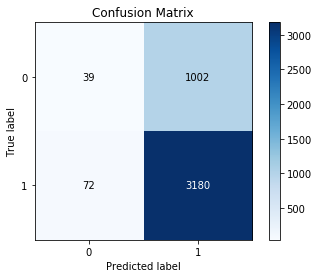

In [8]:
evaluate_features(X_train,Y_train,RandomForestClassifier(n_estimators=2000, max_depth=16, verbose=1))

In [97]:
Y_train

array([False,  True,  True, ..., False, False,  True])